In [48]:
import pandas as pd
%load_ext autoreload

%autoreload 2
from tqdm import tqdm
import os
import numpy as np
from alphapept.feature_finding import extract_hills, remove_duplicate_hills, split_hills, filter_hills, get_hill_data, get_pre_isotope_patterns, get_isotope_patterns, feature_finder_report
from alphapept.constants import averagine_aa, isotopes
# from toolsets.file_io import readin_MSDIAL
from toolsets.search import quick_search_values, string_search
from toolsets.ff_droup import process_mzml, EIC, get_EIC_list
from feature_finding.feature_finding_alphapept import find_feature, find_feature_alphapept
from feature_finding.load_mzml_data import load_mzml_data
import toolsets.spectra_operations as so
from toolsets.spectra_plotter import head_to_tail_plot
from toolsets.flash_entropy_helper import flash_entropy, flash_entropy_simple

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
peak_list_pos_dir = '/Volumes/Brother_cow/brighseed/peak_list/20230206_PHV_H2L_1870AX_M5P2_M7P1/pos'
mzml_dir = '/Users/fanzhou.kong/Dropbox (Brightseed)/Mac/Documents/GitHub/data_garage/brighseed/MZMLS/20230206_PHV_H2L_1870AX_M5P2_M7P1'

In [9]:
sdf = '/Users/fanzhou.kong/Dropbox (Brightseed)/Mac/Documents/GitHub/data_garage/brighseed/PHV_stress/MEGx_Theobroma_Rheum_2023-04-12 (2).sdf'
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import CalcMolFormula
from rdkit.Chem.Descriptors import ExactMolWt

In [11]:
suppl = Chem.SDMolSupplier(sdf)

In [50]:
from toolsets.API_gets import smiles_to_name

In [65]:
name = []
inchikey = []
formula = []
mono_mass = []
smiles = []
for mol in suppl:
    # smiles.append(Chem.MolToSmiles(mol))
    name.append(smiles_to_name(Chem.MolToSmiles(mol)))
    inchikey.append(Chem.MolToInchiKey(mol))
    formula.append(CalcMolFormula(mol))
    mono_mass.append(ExactMolWt(mol))
    smiles.append(Chem.MolToSmiles(mol))
    # break
output = pd.DataFrame(zip(name, inchikey, formula, mono_mass, smiles),
                      columns=['name', 'inchikey', 'formula', 'mono_mass', 'smiles']
                      )

output.to_csv('/Users/fanzhou.kong/Dropbox (Brightseed)/Mac/Documents/GitHub/data_garage/brighseed/PHV_stress/MEGx_Theobroma_Rheum_2023-04-12 (2).csv', index = False)

# MSDIAL result analysis

In [797]:
ms_dial_result = readin_MSDIAL(os.path.join(peak_list_pos_dir, '1870_AX_M5P2_M7P1_M7_X24_P.txt'))

In [791]:
mz = 437.2140
quick_search_values(ms_dial_result, 'Precursor m/z',mz-0.005, mz+0.005, ifsorted=False)

,PeakID,Title,Scans,RT left(min),RT (min),RT right (min),Precursor m/z,Height,Area,Model masses,...,m/z matched,MS/MS matched,RT similarity,Dot product,Reverse dot product,Fragment presence %,Total score,S/N,MS1 isotopes,MSMS spectrum


In [ ]:
for i in range(e.shape[0]):
    e.iloc[i, qc] = e.iloc[i, :].groupby(batch.iloc[0, :]).apply(
        lambda x: x[x.iloc[:, 1]].iloc[:, 0].median() - x[~x.iloc[:, 1]].iloc[:, 0].median()).values

In [798]:
mz = 447.0927
quick_search_values(ms_dial_result, 'Precursor m/z',mz-0.005, mz+0.005, ifsorted=False)

,PeakID,Title,Scans,RT left(min),RT (min),RT right (min),Precursor m/z,Height,Area,Model masses,...,m/z matched,MS/MS matched,RT similarity,Dot product,Reverse dot product,Fragment presence %,Total score,S/N,MS1 isotopes,MSMS spectrum
3383,3383,Unknown,905,2.933113,3.23033,3.504901,447.0926,159414.578125,974788.5,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,3188.292,447.09259:417997 447.27844:61532 448.09561:102...,NaN


In [799]:
mz = 449.1118
quick_search_values(ms_dial_result, 'Precursor m/z',mz-0.005, mz+0.005, ifsorted=False)

,PeakID,Title,Scans,RT left(min),RT (min),RT right (min),Precursor m/z,Height,Area,Model masses,...,m/z matched,MS/MS matched,RT similarity,Dot product,Reverse dot product,Fragment presence %,Total score,S/N,MS1 isotopes,MSMS spectrum
2203,2203,Unknown,829,2.605548,2.951403,3.23033,449.1078,21049.837891,131978.046875,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,420.9967,449.10782:46597 450.11615:160650 450.25171:150...,NaN


In [800]:
mz = 530.3314
quick_search_values(ms_dial_result, 'Precursor m/z',mz-0.005, mz+0.005, ifsorted=False)

,PeakID,Title,Scans,RT left(min),RT (min),RT right (min),Precursor m/z,Height,Area,Model masses,...,m/z matched,MS/MS matched,RT similarity,Dot product,Reverse dot product,Fragment presence %,Total score,S/N,MS1 isotopes,MSMS spectrum
3249,3249,Unknown,895,2.788326,3.196181,3.592841,530.332,1348617.375,9145183.0,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,26972.35,530.33197:2018484 531.29755:37298 531.33569:56...,NaN


In [801]:
mz = 455.227
quick_search_values(ms_dial_result, 'Precursor m/z',mz-0.005, mz+0.005, ifsorted=False)

,PeakID,Title,Scans,RT left(min),RT (min),RT right (min),Precursor m/z,Height,Area,Model masses,...,m/z matched,MS/MS matched,RT similarity,Dot product,Reverse dot product,Fragment presence %,Total score,S/N,MS1 isotopes,MSMS spectrum
9345,9345,Unknown,1992,6.740265,6.907817,7.093323,455.2235,12395.050781,6.171596e+04,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,247.901,455.22351:15447 455.37778:24443,NaN
3525,3525,Unknown,915,3.213468,3.264900,3.436465,455.2257,150612.343750,1.222983e+06,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,2512.520,455.22568:247323 456.22833:39080 457.23932:369...,NaN


# analysis of alphapept result

In [947]:
mzml_file = 'QC_Pool3_P.mzML'

In [965]:
mzml_file = '1870_AX_M5P2_M7P1_M7_X55_P.mzML'

In [966]:
feature_table, lookup = find_feature_alphapept(os.path.join(mzml_dir,mzml_file))

In [967]:
mz = 437.2140
quick_search_values(feature_table, 'mz', mz-0.005, mz+0.005, ifsorted=False)

,mz,mz_std,mz_most_abundant,charge,rt_start,rt_apex,rt_end,fwhm,n_isotopes,mass,ms1_int_sum_apex,ms1_int_sum_area,ms1_int_max_apex,ms1_int_max_area
1658,437.215159,0.000683,437.215159,1.0,3.919068,3.949402,3.999958,0.040445,2.0,436.207882,2.534570e+06,105390.585130,2024997.0,89084.251034
1965,437.215179,0.000389,437.215179,1.0,4.145153,4.217226,4.321849,0.039524,2.0,436.207902,4.365055e+05,24661.340016,381794.0,20458.620886


In [968]:
mz = 447.0927
quick_search_values(feature_table, 'mz', mz-0.005, mz+0.005, ifsorted=False)

,mz,mz_std,mz_most_abundant,charge,rt_start,rt_apex,rt_end,fwhm,n_isotopes,mass,ms1_int_sum_apex,ms1_int_sum_area,ms1_int_max_apex,ms1_int_max_area
1322,447.092963,0.000092,447.092963,1.0,3.135569,3.225243,3.278759,0.027481,2.0,446.085687,326705.967242,14861.990759,272118.0,12661.193929


In [969]:
mz = 449.1118
quick_search_values(feature_table, 'mz', mz-0.005, mz+0.005, ifsorted=False)

,mz,mz_std,mz_most_abundant,charge,rt_start,rt_apex,rt_end,fwhm,n_isotopes,mass,ms1_int_sum_apex,ms1_int_sum_area,ms1_int_max_apex,ms1_int_max_area


In [970]:
mz = 455.227
quick_search_values(feature_table, 'mz', mz-0.005, mz+0.005, ifsorted=False)

,mz,mz_std,mz_most_abundant,charge,rt_start,rt_apex,rt_end,fwhm,n_isotopes,mass,ms1_int_sum_apex,ms1_int_sum_area,ms1_int_max_apex,ms1_int_max_area
1421,455.225764,0.000146,455.225764,1.0,3.486135,3.580480,3.649997,0.044690,2.0,454.218487,357687.519497,18905.455613,298791.0,16154.675950
1313,455.226027,0.000193,455.226027,1.0,3.101818,3.225374,3.386284,0.169530,2.0,454.218751,48410.930608,7577.875814,40187.0,6093.488064
1938,455.228383,0.001039,455.228383,1.0,4.128847,4.165067,4.233762,0.031225,2.0,454.221106,214548.782509,8677.306109,169618.0,7658.273026


In [971]:
mz = 530.3314
quick_search_values(feature_table, 'mz', mz-0.005, mz+0.005, ifsorted=False)

,mz,mz_std,mz_most_abundant,charge,rt_start,rt_apex,rt_end,fwhm,n_isotopes,mass,ms1_int_sum_apex,ms1_int_sum_area,ms1_int_max_apex,ms1_int_max_area


In [16]:
mzml_file = 'QC_Pool2_P.mzML'
mzml_dir = '/Users/fanzhou.kong/Dropbox (Brightseed)/Mac/Documents/GitHub/data_garage/brighseed/MZMLS/20230206_PHV_H2L_1870AX_M5P2_M7P1/pos'

In [17]:
ms1, ms2 = process_mzml(os.path.join(mzml_dir, mzml_file), if_mix=False)

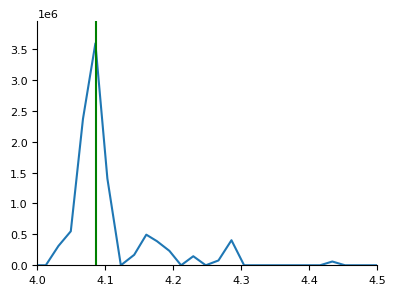

In [22]:
rt_list, intensity_list = get_EIC_list(ms1, 437.2140, step = 0.001)
EIC(rt_list, intensity_list,
    # vlines_location_1=[1.399152],
    vlines_location_2=[4.086],

    rt_start=4, rt_end=4.5
    )

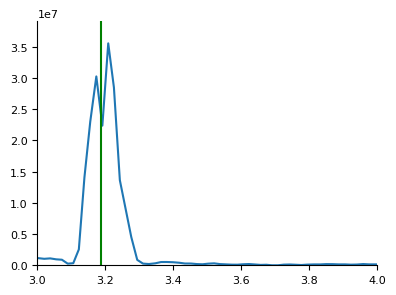

In [25]:
rt_list, intensity_list = get_EIC_list(ms1, 447.0927, step = 0.005)
EIC(rt_list, intensity_list,
    # vlines_location_1=[1.399152],
    vlines_location_2=[3.186],

    rt_start=3, rt_end=4
    )

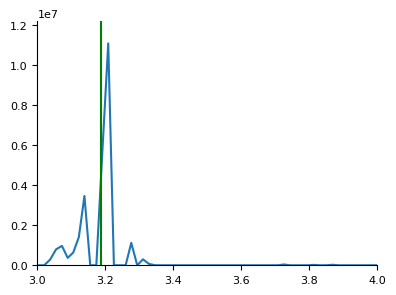

In [26]:
rt_list, intensity_list = get_EIC_list(ms1, 449.1118, step = 0.005)
EIC(rt_list, intensity_list,
    # vlines_location_1=[1.399152],
    vlines_location_2=[3.186],

    rt_start=3, rt_end=4
    )

In [ ]:
rt_list, intensity_list = get_EIC_list(ms1, 437.2140, step = 0.001)
EIC(rt_list, intensity_list,
    # vlines_location_1=[1.399152],
    vlines_location_2=[4.086],

    rt_start=4, rt_end=4.5
    )

In [912]:
pre_isotope_patterns, stats_df, stats = find_feature_alphapept(os.path.join(mzml_dir, 'QC_Pool2_P.mzML'), debug=True)

0.005


In [913]:
quick_search_values(stats_df, 'mz', 530.3314-0.005,530.3314+0.005, ifsorted=False)

,mz,mz_std,int1,intensity_apex,rt_left,rt_end
12152,530.331850,0.000209,21459.098710,285203.0,3.105389,3.208342
13169,530.332225,0.000105,526626.769906,2780296.0,3.225054,3.887105


In [914]:
check_iso(pre_isotope_patterns, 13169)

  7%|▋         | 313/4616 [00:00<00:00, 994558.45it/s]


313

In [915]:
stats_df.loc[pre_isotope_patterns[313]]

,mz,mz_std,int1,intensity_apex,rt_left,rt_end
12312,531.335543,0.000121,151653.265234,815153.0,3.121807,3.639873
13169,530.332225,0.000105,526626.769906,2780296.0,3.225054,3.887105
13654,532.341929,0.000788,18934.127947,200692.0,3.310691,3.485928


In [661]:
530.332192-531.335619

-1.0034269999999879

In [ ]:
530.332192

In [649]:
mz = 524.286117
quick_search_values(feature_table, 'mz', mz-0.005, mz+0.005, ifsorted=False)

,mz,mz_std,mz_most_abundant,charge,rt_start,rt_apex,rt_end,fwhm,n_isotopes,mass,ms1_int_sum_apex,ms1_int_sum_area,ms1_int_max_apex,ms1_int_max_area
29,524.286117,0.000195,524.286117,1.0,3.082599,3.213395,3.551284,0.163495,4.0,523.278841,2.345164e+06,561227.91222,1291592.0,268070.121081


In [974]:
mzml_dir = '/Volumes/Brother_cow/brighseed/MZMLS/20230206_PHV_H2L_1870AX_M5P2_M7P1/pos'

In [992]:
feature_table.to_csv()

,mz,mz_std,mz_most_abundant,charge,rt_start,rt_apex,rt_end,fwhm,n_isotopes,mass,ms1_int_sum_apex,ms1_int_sum_area,ms1_int_max_apex,ms1_int_max_area
872,100.024191,0.000049,100.024191,1.0,1.188448,1.242076,1.278434,0.089986,2.0,99.016914,1.223979e+04,868.632630,9989.0,801.169278
185,100.111913,0.000014,100.111913,1.0,0.690709,0.866493,1.007120,0.087892,2.0,99.104637,8.612048e+05,92131.282366,803284.0,96479.915487
636,100.509759,0.000020,100.509759,1.0,0.550082,0.550082,0.691597,0.030018,2.0,99.502482,4.410600e+04,1904.418270,40920.0,2130.738236
27,100.932237,0.000039,100.932237,1.0,0.550082,0.550082,0.813207,0.020240,3.0,99.924961,3.375000e+04,1866.616026,10985.0,1378.535493
605,100.956644,0.000022,100.956644,1.0,0.550082,0.550082,0.921943,0.015657,2.0,99.949368,1.061300e+05,5798.678303,75712.0,4971.120078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,1296.089496,0.001842,1296.089496,1.0,7.832974,7.869046,7.902997,0.027585,3.0,1295.082219,7.226976e+06,230629.964534,5244353.0,164592.164765
2679,1318.658736,0.003456,1318.658736,1.0,7.851819,7.868870,7.921817,0.039486,2.0,1317.651459,5.755279e+05,23485.126612,395075.0,22473.382516
135,1338.959508,0.001963,1340.965972,1.0,9.039618,9.090873,9.110094,0.070476,4.0,1337.952232,7.688965e+05,42859.243856,264808.0,15095.212235
2886,1348.013841,0.001550,1348.013841,1.0,9.073840,9.129012,9.146668,0.025012,2.0,1347.006565,6.990097e+05,31082.877382,374479.0,19891.305109


In [986]:
file_name_lists = []
for root, dirs, files in os.walk(mzml_dir):
    for file in tqdm(files, total = len(files)):
        if file.endswith('.mzML'):
            file_name_lists.append(file)

100%|██████████| 131/131 [00:00<00:00, 1990774.72it/s]


In [991]:
file_name_lists[0].split('.')[0]

'1870_AX_M5P2_M7P1_M7_X44_P'

In [982]:
feature_folder = '/Volumes/Brother_cow/brighseed/alphapept_features/20230206_PHV_H2L_1870AX_M5P2_M7P1/pos'

In [983]:
os.path.exists(feature_folder)

False

In [985]:
len(files)

131

In [984]:
os.makedirs(feature_folder)

In [3]:
ttt = pd.read_csv(os.path.join('/Volumes/Brother_cow/brighseed/alphapept_features/20230206_PHV_H2L_1870AX_M5P2_M7P1/pos', 'QC_POOL3_P.csv'))

In [4]:
ttt

,mz,mz_std,mz_most_abundant,charge,rt_start,rt_apex,rt_end,fwhm,n_isotopes,mass,ms1_int_sum_apex,ms1_int_sum_area,ms1_int_max_apex,ms1_int_max_area
0,113.114987,0.000024,113.114987,1.0,9.468521,9.647772,9.721945,0.234881,3.0,112.107710,4.830074e+07,8.091424e+06,46709764.0,8.025095e+06
1,112.116117,0.000043,112.116117,1.0,9.466334,9.684419,9.719858,0.190824,3.0,111.108840,1.599552e+07,2.345919e+06,11332676.0,1.663116e+06
2,112.107405,0.000168,112.107405,1.0,9.448416,9.610126,9.719858,0.054866,2.0,111.100128,6.667632e+06,7.921323e+05,5439267.0,5.149047e+05
3,112.120777,0.000025,112.120777,1.0,9.466334,9.501773,9.665337,0.068151,2.0,111.113501,4.072728e+06,3.952478e+05,3938354.0,3.729734e+05
4,112.102530,0.000337,112.102530,1.0,9.537873,9.647616,9.665906,0.076820,2.0,111.095254,4.676577e+06,2.789139e+05,4691008.0,2.998841e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287,924.271590,0.000667,924.271590,1.0,9.831748,9.919924,9.938204,0.032259,2.0,923.264314,1.732896e+06,8.033904e+04,948020.0,4.080841e+04
4288,369.148390,0.000235,369.148390,1.0,9.849498,9.956427,9.975521,0.108201,2.0,368.141113,9.056009e+05,8.682292e+04,809084.0,7.215927e+04
4289,988.789664,0.001086,988.789664,1.0,9.903820,9.938584,9.975521,0.071701,2.0,987.782388,2.850205e+05,1.824486e+04,171868.0,1.034399e+04
4290,929.704178,0.001366,929.704178,1.0,9.919754,9.975521,9.975521,0.047076,2.0,928.696902,5.826960e+05,1.994997e+04,386062.0,1.577767e+04


In [11]:
mz = 455.227
quick_search_values(ttt, 'mz', mz-0.005, mz+0.005, ifsorted=False)

,mz,mz_std,mz_most_abundant,charge,rt_start,rt_apex,rt_end,fwhm,n_isotopes,mass,ms1_int_sum_apex,ms1_int_sum_area,ms1_int_max_apex,ms1_int_max_area
379,455.225819,0.000403,455.225819,1.0,3.523630,3.594809,3.681806,0.055362,3.0,454.218542,2.188881e+07,1.435012e+06,16982990.0,1.187488e+06
2513,455.225917,0.000320,455.225917,1.0,3.854203,3.982719,4.290238,0.064258,2.0,454.218640,4.597053e+05,5.915301e+04,383428.0,5.078050e+04


# split pos/neg

In [2]:
all_folder = '/Volumes/Brother_cow/brighseed/2068_AX_M6P1/2068_AX_M6P1'

In [33]:
# pos_neg_folder = '/Volumes/Brother_cow/brighseed/2068_AX_M6P1/2068_AX_M6P1'
pos_folder = os.path.join(all_folder, 'pos')
neg_folder = os.path.join(all_folder, 'neg')
for folder in [pos_folder, neg_folder]:
    if os.path.exists(folder)==False:
        os.makedirs(folder)

In [34]:
neg_folder

'/Volumes/Brother_cow/brighseed/2068_AX_M6P1/2068_AX_M6P1/neg'

In [17]:
import shutil

In [44]:
# file_lists = []
for root, dirs, files in os.walk(all_folder):
    for file in files:
        # print(file)

        if file.endswith('.raw'):
            if len(file.split('.'))==2:
                if file[-5]=='P':
                    shutil.move(os.path.join(all_folder, file), os.path.join(pos_folder, file))
                elif file[-5]=='N':
                    shutil.move(os.path.join(all_folder, file), os.path.join(neg_folder, file))
            # file_lists.append(file)
            # print(file)
            # if file[-5]=='P':
            #     shutil.move(os.path.join(all_folder, file), os.path.join(pos_folder, file))
            # elif file[-5]=='N':
            #     shutil.move(os.path.join(all_folder, file), os.path.join(neg_folder, file))
            # if file.split('.')==2:


            # file_name_lists.append(file)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Brother_cow/brighseed/2068_AX_M6P1/2068_AX_M6P1/20221219_2068_AX_M6P1_X20_P.raw'

In [65]:
data_dir = '/Users/fanzhou.kong/Dropbox (Brightseed)/Mac/Documents/GitHub/data_garage/sanghuon/614'
ms1, ms2 = process_mzml(os.path.join(data_dir, 'LFD3.mzML'), if_mix= False,with_ms1=True)

lfd3_found = find_feature(ms2, 271.0600, 4.90, mz_column='precursor_mz', rt_column='rt')

10


In [66]:
lfd3_found

,scan_idx,cycle,ms_level,precursor_mz,charge,rt,peaks,isolation_window,ms1_pmz,ms1_rt,ms1_precursor_intensity,peak_purity,mz_offset,mix,base_name
1582,1373,278,2.0,271.059357,1,4.834768,86.91967010498047\t9288.2998046875\n136.081466...,"(270.559356689453, 271.559356689453)",271.059784,4.833296,8.651614e+04,0.714957,0.000427,LFD3.mzML,LFD3.mzML
1583,1385,280,2.0,271.059845,1,4.882142,132.5458221435547\t8232.5458984375\n155.448654...,"(271.564300537109, 272.564300537109)",271.059875,4.869722,4.587918e+06,3.665435,0.000031,LFD3.mzML,LFD3.mzML
1584,1403,284,2.0,271.059845,1,4.944801,72.10771942138672\t7220.3671875\n72.7483520507...,"(270.559844970703, 271.559844970703)",271.059998,4.943329,7.293088e+04,0.506482,0.000153,LFD3.mzML,LFD3.mzML


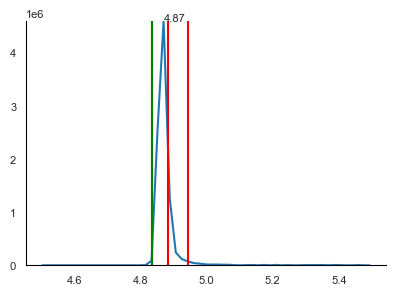

In [67]:
rt_list, intensity_list = get_EIC_list(ms1, 271.0600)
EIC(rt_list, intensity_list,
    rt_start=4.5, rt_end=5.5,
    vlines_location_1=lfd3_found['rt'],
    vlines_location_2=lfd3_found['rt'][:1],
    savepath=os.path.join(data_dir, 'eic_lf3.png')
    )

In [111]:
data_dir = '/Users/fanzhou.kong/Dropbox (Brightseed)/Mac/Documents/GitHub/data_garage/sanghuon/614'
ms1, ms2 = process_mzml(os.path.join(data_dir, 'STD638.mzML'), if_mix= False,with_ms1=True)

std_found = find_feature(ms2, 271.0600, 4.90, mz_column='precursor_mz', rt_column='rt')
std_found

10


,scan_idx,cycle,ms_level,precursor_mz,charge,rt,peaks,isolation_window,ms1_pmz,ms1_rt,ms1_precursor_intensity,peak_purity,mz_offset,mix,base_name
1744,1366,278,2,271.059814,1,4.843553,73.9437255859375\t8725.130859375\n98.884025573...,"(270.559814453125, 271.559814453125)",271.059875,4.842342,8382195.000,0.969387,0.000061,STD638.mzML,STD638.mzML
1743,1396,284,2,271.059967,1,4.950242,85.05638122558594\t8240.876953125\n90.18551635...,"(270.559967041016, 271.559967041016)",271.059845,4.948770,373228.625,0.942442,-0.000122,STD638.mzML,STD638.mzML


In [113]:
lfd3_found.to_csv(os.path.join(data_dir, 'lfd3_features.csv'), index = False)

In [114]:
std_found.to_csv(os.path.join(data_dir, 'std_features.csv'), index = False)

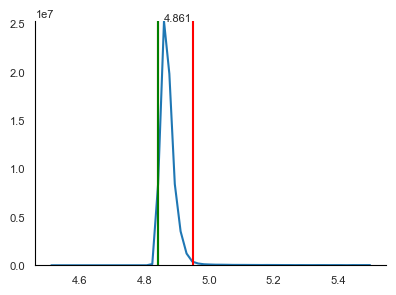

In [112]:
rt_list, intensity_list = get_EIC_list(ms1, 271.0600)
EIC(rt_list, intensity_list,
    rt_start=4.5, rt_end=5.5,
    vlines_location_1=std_found['rt'],
    vlines_location_2=std_found['rt'][:1],
    savepath=os.path.join(data_dir, 'eic_std.png')
    )

In [93]:
flash_entropy_simple(so.clean_spectrum(lfd3_found.iloc[0]['peaks'], max_mz=271.06) ,
                     so.clean_spectrum( std_found.iloc[0]['peaks'], max_mz=271.06),

                     pmz=271.0600)

0.7640396

In [95]:
so.convert_string_to_nist(lfd3_found.iloc[0]['peaks'])

array([[8.6919670e+01, 9.2882998e+03],
       [1.3608147e+02, 8.6736895e+03],
       [1.5223253e+02, 8.2789844e+03],
       [1.7436491e+02, 9.7349600e+03],
       [1.9863608e+02, 9.7858809e+03],
       [2.2505418e+02, 2.4440334e+04],
       [2.4104858e+02, 3.3351430e+04],
       [2.5304915e+02, 2.3258773e+05]], dtype=float32)

In [104]:
tt = so.convert_string_to_nist(std_found.iloc[0]['peaks'])

<module 'matplotlib.pyplot' from '/Users/fanzhou.kong/miniconda3/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

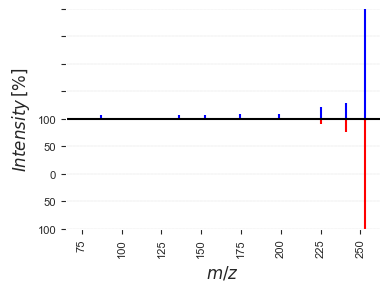

In [89]:
head_to_tail_plot(lfd3_found.iloc[0]['peaks'], std_found.iloc[0]['peaks'], savepath=os.path.join(data_dir, 'head_to_tail_764.png'))

<module 'matplotlib.pyplot' from '/Users/fanzhou.kong/miniconda3/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

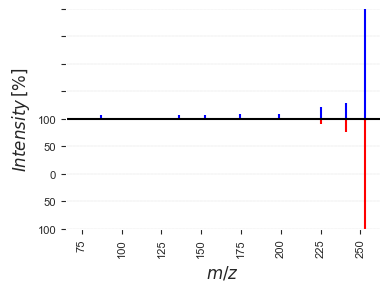

In [62]:
so.entropy_similarity_default(so.clean_spectrum(lfd3_found.iloc[0]['peaks'], max_mz=271.059845, keep_precursor=False ) ,
                              so.clean_spectrum(std_found.iloc[0]['peaks'], max_mz=271.059845, keep_precursor=False )
                              )
head_to_tail_plot(
    so.clean_spectrum(lfd3_found.iloc[0]['peaks'], max_mz=271.059845, keep_precursor=False ) ,
    so.clean_spectrum(std_found.iloc[0]['peaks'], max_mz=271.059845, keep_precursor=False )
)

In [39]:
data_dir = '/Users/fanzhou.kong/Dropbox (Brightseed)/Mac/Documents/GitHub/data_garage/sanghuon/615'
ms1, ms2 = process_mzml(os.path.join(data_dir, 'LFD3.mzML'), if_mix= False,with_ms1=True)

lfd3_found = find_feature(ms2, 271.0600, 4.90, mz_column='precursor_mz', rt_column='rt')

10


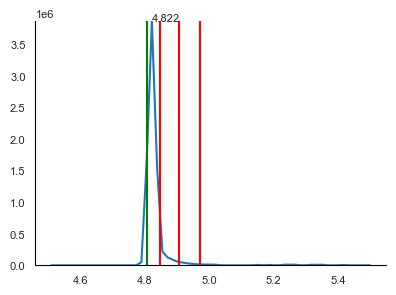

In [53]:
rt_list, intensity_list = get_EIC_list(ms1, 271.0600)
EIC(rt_list, intensity_list,
    rt_start=4.5, rt_end=5.5,
    vlines_location_1=lfd3_found['rt'][1:],
    vlines_location_2=lfd3_found['rt'][:1],
    savepath=os.path.join(data_dir, 'eic_lf3d.png')
    )

In [54]:
ms1, ms2 = process_mzml(os.path.join(data_dir, 'STD638.mzML'), if_mix= False,with_ms1=True)

std_found = find_feature(ms2, 271.0600, 4.90, mz_column='precursor_mz', rt_column='rt')

10


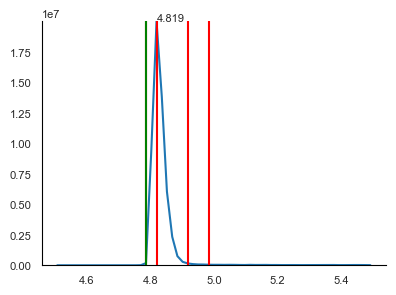

In [64]:
rt_list, intensity_list = get_EIC_list(ms1, 271.0600)
EIC(rt_list, intensity_list,
    rt_start=4.5, rt_end=5.5,
    vlines_location_1=std_found['rt'],
    vlines_location_2=std_found['rt'][0:1],
    savepath=os.path.join(data_dir, 'eic_std.png')
    )

In [38]:
lfd3_found.to_csv(os.path.join(data_dir, 'lfd3_features.csv'), index = False)
std_found.to_csv(os.path.join(data_dir, 'std_features.csv'), index = False)

In [62]:
flash_entropy_simple(peak1= lfd3_found.iloc[0]['peaks'], pmz=271.0600,
              peak2= std_found.iloc[0]['peaks'])

0.7447808

In [31]:
from toolsets.spectra_plotter import head_to_tail_plot

<module 'matplotlib.pyplot' from '/Users/fanzhou.kong/miniconda3/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

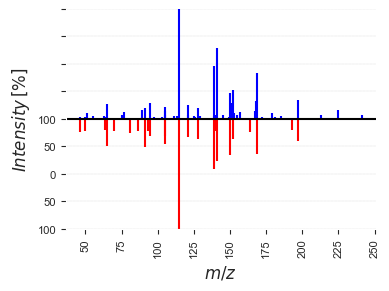

In [63]:
head_to_tail_plot(lfd3_found.iloc[0]['peaks'], std_found.iloc[0]['peaks'], savepath=os.path.join(data_dir, 'head_to_tail_745.png'))

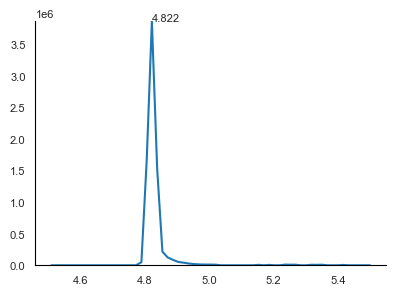

In [80]:
rt_list, intensity_list = get_EIC_list(ms1, 271.0600)
EIC(rt_list, intensity_list,
    rt_start=4.5, rt_end=5.5,
    # vlines_location_1=a
    )
# 0 position is best quailtiy

In [15]:
ms1, ms2 = process_mzml(os.path.join(data_dir, 'STD638.mzML'), if_mix= False,with_ms1=True)

std_found = find_feature(ms2, 271.0600, 4.90, mz_column='precursor_mz', rt_column='rt')

10


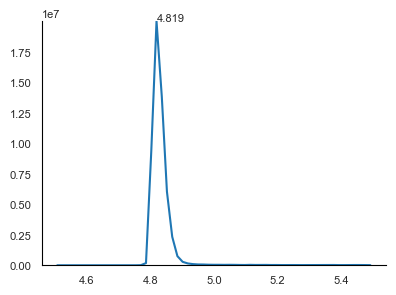

In [83]:
rt_list, intensity_list = get_EIC_list(ms1, 271.0600)
EIC(rt_list, intensity_list,
    rt_start=4.5, rt_end=5.5,
    # vlines_location_1=a
    )

# Msdial result alighment part

In [3]:
working_dir = '/Volumes/Brother_cow/brighseed/alignment_result'

In [4]:
from toolsets.file_io import readin_alignment

In [5]:
alignment_result = readin_alignment(os.path.join(working_dir, 'Height_0_20237101534.txt'))

In [6]:
alignment_result

,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Adduct type,Post curation result,Fill %,MS/MS assigned,Reference RT,Reference m/z,...,1870_AX_M5P2_M7P1_M7_X56_P,1870_AX_M5P2_M7P1_M7_X57_P,1870_AX_M5P2_M7P1_M7_X58_P,1870_AX_M5P2_M7P1_M7_X59_P,QC_Pool1_P,QC_Pool2_P,QC_Pool3_P,1,1.1,peaks
0,0,8.807,100.01737,Unknown,[M+H]+,ion correlated with 2080; ion correlated with ...,0.026,False,NaN,NaN,...,0,0,0,0,0,0,0,1882.595553,11756.805460,NaN
1,1,9.648,100.02043,Unknown,[M+H]+,ion correlated with 5410; ion correlated with ...,0.026,False,NaN,NaN,...,0,0,0,0,0,0,85552,2193.641827,13699.288818,NaN
2,2,9.736,100.03606,Unknown,[M+H]+,ion correlated with 2373; ion correlated with ...,0.026,False,NaN,NaN,...,0,0,0,0,0,0,0,3657.637420,22841.938366,NaN
3,3,3.933,100.07549,Unknown,[M+H]+,ion correlated with 7926; ion correlated with ...,0.103,False,NaN,NaN,...,6562,6124,8350,5828,22070,16878,20017,11214.684506,21361.890915,NaN
4,4,4.523,100.07557,Unknown,[M+H]+,ion correlated with 34565; ion correlated with...,0.026,False,NaN,NaN,...,5446,7253,4750,3170,9461,12847,10056,7736.201773,11018.047656,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34829,34829,3.224,1484.40198,Unknown,[M+H]+,ion correlated with 32763; ion correlated with...,0.026,False,NaN,NaN,...,0,0,0,0,0,0,0,3972.078926,24805.624944,NaN
34830,34830,5.033,1489.49158,Unknown,[M+H]+,ion correlated with 26184; ion correlated with...,0.051,False,NaN,NaN,...,0,0,0,0,0,0,0,3859.177534,20585.737744,NaN
34831,34831,3.781,1493.32214,Unknown,[M+H]+,ion correlated with 778; ion correlated with 3...,0.051,False,NaN,NaN,...,0,0,0,0,0,0,0,7931.169872,39142.734711,NaN
34832,34832,8.409,1494.22510,Unknown,[M+H]+,ion correlated with 5384; ion correlated with ...,0.026,False,NaN,NaN,...,0,0,0,0,0,0,0,2010.268630,12554.123569,NaN


In [7]:
mz = 437.2140
quick_search_values(alignment_result, 'Average Mz',mz-0.005, mz+0.005, ifsorted=False)

,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Adduct type,Post curation result,Fill %,MS/MS assigned,Reference RT,Reference m/z,...,1870_AX_M5P2_M7P1_M7_X56_P,1870_AX_M5P2_M7P1_M7_X57_P,1870_AX_M5P2_M7P1_M7_X58_P,1870_AX_M5P2_M7P1_M7_X59_P,QC_Pool1_P,QC_Pool2_P,QC_Pool3_P,1,1.1,peaks
18265,18265,4.081,437.21457,Unknown,[M+H]+,ion correlated with 18080,0.308,True,NaN,NaN,...,52398,40237,11275,40609,1737064,1748307,1741972,712389.206217,1.798034e+06,122.59386\t5646\n127.48344\t7634\n152.10555\t7...
18266,18266,4.329,437.21487,Unknown,[M+H]+,ion correlated with 21824; ion correlated with...,0.077,True,NaN,NaN,...,76595,45988,12508,33347,275019,255403,289784,135619.220533,5.074019e+05,122.87981\t7586\n132.03593\t6204\n134.94054\t6...
18267,18267,3.951,437.21506,Unknown,[M+2H]2+,NaN,0.205,True,NaN,NaN,...,241633,213077,101464,25122,611023,621924,621099,290321.798089,3.631153e+05,116.95888\t6545\n126.89822\t5999\n129.75084\t7...
18268,18268,3.695,437.21637,Unknown,[M+H]+,NaN,0.077,False,NaN,NaN,...,0,0,396,1422,100458,83889,103927,73732.369032,1.012507e+05,NaN


In [8]:
mz = 449.1118
quick_search_values(alignment_result, 'Average Mz',mz-0.005, mz+0.005, ifsorted=False)

,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Adduct type,Post curation result,Fill %,MS/MS assigned,Reference RT,Reference m/z,...,1870_AX_M5P2_M7P1_M7_X56_P,1870_AX_M5P2_M7P1_M7_X57_P,1870_AX_M5P2_M7P1_M7_X58_P,1870_AX_M5P2_M7P1_M7_X59_P,QC_Pool1_P,QC_Pool2_P,QC_Pool3_P,1,1.1,peaks
18812,18812,3.201,449.10794,Unknown,[M+H]+,NaN,0.154,True,NaN,NaN,...,12725,14231,9359,12895,5618292,5264576,6063430,1.853630e+06,5.018970e+06,133.80403\t26105\n195.03072\t20421\n245.04315\...
18813,18813,2.952,449.10797,Unknown,[M+H]+,NaN,0.333,True,NaN,NaN,...,0,0,0,0,296993,303974,317937,1.605634e+05,3.404614e+05,122.47907\t5958\n128.69255\t7357\n137.69299\t6...
18814,18814,3.099,449.10825,Unknown,[M+H]+,ion correlated with 10458,0.077,False,NaN,NaN,...,549,1890,1158,5098,1167125,1336322,956931,4.029975e+05,1.038200e+06,NaN
18815,18815,3.289,449.10828,Unknown,[M+H]+,ion correlated with 11845,0.103,False,NaN,NaN,...,2744,2780,1120,2310,626914,620298,911247,2.911773e+05,7.391990e+05,NaN


In [11]:
mz = 530.3314
quick_search_values(alignment_result, 'Average Mz',mz-0.005, mz+0.005, ifsorted=False)

,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Adduct type,Post curation result,Fill %,MS/MS assigned,Reference RT,Reference m/z,...,1870_AX_M5P2_M7P1_M7_X56_P,1870_AX_M5P2_M7P1_M7_X57_P,1870_AX_M5P2_M7P1_M7_X58_P,1870_AX_M5P2_M7P1_M7_X59_P,QC_Pool1_P,QC_Pool2_P,QC_Pool3_P,1,1.1,peaks
22684,22684,3.514,530.33154,Unknown,[M+H]+,NaN,0.128,False,NaN,NaN,...,0,0,0,0,1107102,864675,997246,4.494300e+05,9.804947e+05,NaN
22685,22685,3.360,530.33215,Unknown,[M+H]+,ion correlated with 22686; ion correlated with...,0.410,True,NaN,NaN,...,4204,0,0,4472,2836484,2416619,2854840,1.279784e+06,3.166368e+06,148.9222\t12030\n172.09767\t13059\n173.45969\t...
22686,22686,3.316,530.33240,Unknown,[M+H]+,ion correlated with 22584; ion correlated with...,0.154,True,NaN,NaN,...,4204,0,0,4472,2836484,2416619,2341993,1.061724e+06,2.705640e+06,156.10002\t8024\n187.05949\t29318\n203.179\t70...
22687,22687,3.171,530.33289,Unknown,[M+H]+,ion correlated with 18973,0.128,False,NaN,NaN,...,0,0,0,0,252542,238578,249955,1.469798e+05,3.403806e+05,NaN
22688,22688,2.473,530.33337,Unknown,[M+H]+,ion correlated with 12593; ion correlated with...,0.103,False,NaN,NaN,...,0,0,0,0,22075,15862,13192,7.753213e+03,2.850628e+04,NaN


In [12]:
mz = 455.227
quick_search_values(alignment_result, 'Average Mz',mz-0.005, mz+0.005, ifsorted=False)

,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Adduct type,Post curation result,Fill %,MS/MS assigned,Reference RT,Reference m/z,...,1870_AX_M5P2_M7P1_M7_X56_P,1870_AX_M5P2_M7P1_M7_X57_P,1870_AX_M5P2_M7P1_M7_X58_P,1870_AX_M5P2_M7P1_M7_X59_P,QC_Pool1_P,QC_Pool2_P,QC_Pool3_P,1,1.1,peaks
19119,19119,5.957,455.22202,Unknown,[M+H]+,NaN,0.103,False,NaN,NaN,...,0,0,0,0,7574,7175,7400,3.576754e+03,1.165803e+04,NaN
19120,19120,3.977,455.22559,Unknown,[M+H]+,NaN,0.026,True,NaN,NaN,...,0,0,0,0,255796,221995,256651,1.113031e+05,3.151856e+05,134.7758\t6819\n135.23367\t6371\n149.88609\t72...
19121,19121,3.505,455.22562,Unknown,[M+H]+,NaN,0.103,True,NaN,NaN,...,12100,4317,3562,3004,1168889,948943,1234460,7.608023e+05,1.626426e+06,147.6904\t7293\n148.95839\t7387\n157.13699\t66...
19122,19122,3.745,455.22562,Unknown,[M+H]+,NaN,0.026,False,NaN,NaN,...,0,0,0,0,149960,132586,153683,7.023255e+04,1.299335e+05,NaN
19123,19123,3.832,455.22571,Unknown,[M+H]+,NaN,0.051,True,NaN,NaN,...,0,0,0,0,138628,125491,163947,6.868249e+04,9.593784e+04,136.96013\t7062\n202.49704\t8904\n263.66571\t9...
19124,19124,3.038,455.22586,Unknown,[M+H]+,NaN,0.026,False,NaN,NaN,...,0,0,0,0,38754,41599,47592,2.433202e+04,6.497605e+04,NaN
19125,19125,3.263,455.22635,Unknown,[M+H]+,NaN,0.128,False,NaN,NaN,...,1472,0,0,0,0,0,0,2.787029e+04,5.311497e+04,NaN
19126,19126,3.599,455.22757,Unknown,[M+H]+,NaN,0.026,True,NaN,NaN,...,45419,35337,24702,23617,10566451,10346914,10900241,3.679393e+06,8.237079e+06,146.40614\t9665\n148.92172\t8779\n185.04231\t1...
19127,19127,3.434,455.22815,Unknown,[M+H]+,ion correlated with 3766; ion correlated with ...,0.026,False,NaN,NaN,...,2514,2174,959,3004,340901,313609,328864,4.081955e+05,1.334182e+06,NaN


In [21]:
sample_names = alignment_result.columns[32:-3]

In [13]:
istd_info = pd.read_csv('/Users/fanzhou.kong/Dropbox (Brightseed)/Mac/Documents/GitHub/data_garage/brighseed/istd_info.csv')

In [14]:
istd_info

,compound_name,mono_mass,RT_suggested,[M+H]+
0,C4-APS,215.061614,1.18,216.068890
1,C5-APS,229.077265,2.13,230.084541
2,C6-APS,243.092915,2.84,244.100191
3,C7-APS,257.108565,3.42,258.115841
4,C8-APS,271.124215,4.00,272.131491
5,C9-APS,285.139865,4.46,286.147141
6,C10-APS,299.155515,4.91,300.162791
7,C11-APS,313.171165,5.28,314.178441
8,C12-APS,327.186815,5.68,328.194091
9,C13-APS,341.202465,6.03,342.209741


In [85]:
FOUND = []
fill_percent = []
mz = []
mz_offset =[]
rt = []
intensity_cv = []


for index, row in tqdm(istd_info.iterrows(), total = len(istd_info)):
    # print(row['compound_name'])
    # a_found = []
    # a_mz = []
    # a_mz_offset = []
    # a_rt = []
    # a_rt_offset = []

    # m_rt_offset = []
    # isotope = []
    feature_temp = find_feature(alignment_result, row['[M+H]+'], row['RT_suggested'], mz_column='Average Mz', rt_column='Average Rt(min)', intensity_column='QC_Pool1_P')
    if len(feature_temp)>0:
        good_idx = (feature_temp[sample_names].iloc[0]>feature_temp[sample_names].iloc[0].max()/50)
        FOUND.append(True)
        fill_percent.append(good_idx.sum()/len(feature_temp[sample_names].iloc[0]))
        mz.append(feature_temp.iloc[0]['Average Mz'])
        rt.append(feature_temp.iloc[0]['Average Rt(min)'])
        mz_offset.append(abs(feature_temp.iloc[0]['Average Mz']-row['[M+H]+']))
        intensity_cv.append(np.round(feature_temp[sample_names[good_idx]].iloc[0].std()/feature_temp[sample_names[good_idx]].iloc[0].mean()*100, 1))
    else:
        FOUND.append(True)
        fill_percent.append(0)
        mz.append(np.NAN)
        rt.append(np.NAN)
        mz_offset.append(np.NAN)
        intensity_cv.append(np.NAN)
    # break
    # for file in file_list:
    #     msdial_result_temp = readin_MSDIAL(os.path.join(msdial_folder, file+'.txt'))
    #     msdial_feature = find_feature(msdial_result_temp, row['[M+H]+'], row['RT_suggested'], mz_column='Precursor m/z', rt_column='RT (min)', intensity_column='Height')
    #     if len(msdial_feature)>0:
    #         FOUND.append(True)
    #         mz.append(msdial_feature.iloc[0]['Precursor m/z'])
    #         mz_offset.append(np.abs(msdial_feature.iloc[0]['Precursor m/z']-row['[M+H]+']))
    #         rt.append(msdial_feature.iloc[0]['RT (min)'])
    #         # m_rt_offset.append(np.abs(msdial_feature.iloc[0]['RT (min)']-row['RT_suggested']))
    #         isotope.append(msdial_feature.iloc[0]['Isotope'])
    #         intensity.append(msdial_feature.iloc[0]['Height'])
    #     else:
    #         FOUND.append(False)
    #         mz.append(np.NAN)
    #         mz_offset.append(np.NAN)
    #         rt.append(np.NAN)
    #         # rt_offset.append(np.NAN)
    #         isotope.append(np.NAN)
    #         intensity.append(np.NAN)
    #     # break
summary_statistic = pd.DataFrame(list(zip(istd_info['compound_name'], FOUND,
                                              mz,
                                              mz_offset,
                                              rt,
                                                intensity_cv,
                                          fill_percent

                                              )),
                                     columns =['istd_name', 'FOUND','mz', 'mz_offset',
                                               'rt',
                                               'intensity_cv','fill_percent'
                                               ])
    # summary_statistic.to_csv(os.path.join(intensity_dir, row['compound_name']+'_'+ str(np.round(row['[M+H]+'], 3))+'_'+str(np.round(row['RT_suggested'], 2))+'.csv'), index = False)

100%|██████████| 17/17 [00:00<00:00, 94.66it/s]


In [88]:
len(sample_names)

39

In [86]:
summary_statistic

,istd_name,FOUND,mz,mz_offset,rt,intensity_cv,fill_percent
0,C4-APS,True,216.06894,0.000050,1.066,6.3,0.974359
1,C5-APS,True,230.08450,0.000041,2.051,18.9,0.974359
2,C6-APS,True,244.10023,0.000039,2.772,39.3,0.974359
3,C7-APS,True,258.11597,0.000129,3.411,42.0,0.974359
4,C8-APS,True,272.13153,0.000039,3.972,19.0,0.974359
5,C9-APS,True,286.14713,0.000011,4.451,16.8,0.974359
6,C10-APS,True,300.16302,0.000229,4.881,12.7,0.974359
7,C11-APS,True,314.17850,0.000059,5.281,11.1,0.974359
8,C12-APS,True,328.19412,0.000029,5.664,5.4,0.974359
9,C13-APS,True,342.20999,0.000249,6.038,8.0,0.974359


In [78]:
good_idx = (feature_temp[sample_names].iloc[0]>feature_temp[sample_names].iloc[0].max()/50)

In [84]:
good_idx.sum()

38

In [83]:
feature_temp[sample_names[good_idx]]

,1870_AX_M5P2_M7P1_M7_X24_P,1870_AX_M5P2_M7P1_M7_X25_P,1870_AX_M5P2_M7P1_M7_X26_P,1870_AX_M5P2_M7P1_M7_X27_P,1870_AX_M5P2_M7P1_M7_X28_P,1870_AX_M5P2_M7P1_M7_X29_P,1870_AX_M5P2_M7P1_M7_X31_P,1870_AX_M5P2_M7P1_M7_X32_P,1870_AX_M5P2_M7P1_M7_X33_P,1870_AX_M5P2_M7P1_M7_X34_P,...,1870_AX_M5P2_M7P1_M7_X53_P,1870_AX_M5P2_M7P1_M7_X54_P,1870_AX_M5P2_M7P1_M7_X55_P,1870_AX_M5P2_M7P1_M7_X56_P,1870_AX_M5P2_M7P1_M7_X57_P,1870_AX_M5P2_M7P1_M7_X58_P,1870_AX_M5P2_M7P1_M7_X59_P,QC_Pool1_P,QC_Pool2_P,QC_Pool3_P
10418,4917097,4513378,4138342,3747508,3921363,4256786,2172752,3095736,2786526,4708234,...,4071220,4925194,4287763,4251598,3727686,3346088,3439936,3216874,3062679,3334664


In [71]:
feature_temp['1870_AX_M5P2_M7P1_M7_X30_P']

10418    59669
Name: 1870_AX_M5P2_M7P1_M7_X30_P, dtype: int64

In [89]:
summary_statistic

,istd_name,FOUND,mz,mz_offset,rt,intensity_cv,fill_percent
0,C4-APS,True,216.06894,0.000050,1.066,6.3,0.974359
1,C5-APS,True,230.08450,0.000041,2.051,18.9,0.974359
2,C6-APS,True,244.10023,0.000039,2.772,39.3,0.974359
3,C7-APS,True,258.11597,0.000129,3.411,42.0,0.974359
4,C8-APS,True,272.13153,0.000039,3.972,19.0,0.974359
5,C9-APS,True,286.14713,0.000011,4.451,16.8,0.974359
6,C10-APS,True,300.16302,0.000229,4.881,12.7,0.974359
7,C11-APS,True,314.17850,0.000059,5.281,11.1,0.974359
8,C12-APS,True,328.19412,0.000029,5.664,5.4,0.974359
9,C13-APS,True,342.20999,0.000249,6.038,8.0,0.974359


In [90]:
feature_temp = find_feature(alignment_result, 258.11597, 3.411
                            , mz_column='Average Mz', rt_column='Average Rt(min)', intensity_column='QC_Pool1_P')
feature_temp

,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Adduct type,Post curation result,Fill %,MS/MS assigned,Reference RT,Reference m/z,...,1870_AX_M5P2_M7P1_M7_X56_P,1870_AX_M5P2_M7P1_M7_X57_P,1870_AX_M5P2_M7P1_M7_X58_P,1870_AX_M5P2_M7P1_M7_X59_P,QC_Pool1_P,QC_Pool2_P,QC_Pool3_P,1,1.1,peaks
8932,8932,3.411,258.11597,Unknown,[M+H]+,similar chromatogram in higher mz_33697; simil...,0.974,True,NaN,NaN,...,2434797,2342738,2351616,2297314,656049,694792,664642,1.554319e+06,709129.045441,67.09523\t9786\n78.88148\t9478\n85.29395\t9064...


In [91]:
import seaborn as sns

In [93]:
sns.scatterplot(x = np.arange(2, , dtype=float), y = feature_temp.iloc[0][sample_names])

TypeError: Cannot interpret '39' as a data type

In [69]:
feature_temp = find_feature(alignment_result, 286.14713, 4.451
                            , mz_column='Average Mz', rt_column='Average Rt(min)', intensity_column='QC_Pool1_P')
feature_temp

,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Adduct type,Post curation result,Fill %,MS/MS assigned,Reference RT,Reference m/z,...,1870_AX_M5P2_M7P1_M7_X56_P,1870_AX_M5P2_M7P1_M7_X57_P,1870_AX_M5P2_M7P1_M7_X58_P,1870_AX_M5P2_M7P1_M7_X59_P,QC_Pool1_P,QC_Pool2_P,QC_Pool3_P,1,1.1,peaks
10418,10418,4.451,286.14713,Unknown,[M+H]+,NaN,0.974,True,NaN,NaN,...,4251598,3727686,3346088,3439936,3216874,3062679,3334664,3.845470e+06,903485.303616,79.04233\t13655\n85.10125\t13525\n96.04437\t12...


# Elys data

In [69]:
working_dir = '/Users/fanzhou.kong/Dropbox (Brightseed)/Mac/Documents/GitHub/data_garage/elys_data'

In [82]:
bias_table = pd.read_csv(os.path.join(working_dir, 'bias_table.csv'))
all_ms2 = pd.read_csv(os.path.join(working_dir, 'all_ms2.csv'))

In [122]:
all_ms2['key']=all_ms2['reference_name']+all_ms2['reference_adduct']+all_ms2['ce'].astype(str)

In [140]:
all_ms2

,id_spec,id_anno,mix,charge,precursor_mz,rt,reference_name,reference_adduct,ce,concentration,find_name,peaks,rt_spec,precursor_mz_spec,reference_smiles,reference_precursor_mz,peaks_cleaned,peaks_denoised,key
0,360641,1,2,pos,481.2237,11.37,Anthothecol,[M+H],45,3,Anthothecol_[M+H]_45,53.906490325927734:11374.001953125;56.82506179...,11.24,481.224060,CC(=O)OC1CC2(C(CC3C2(O3)C4(C1C5(C=CC(=O)C(C5=C...,481.222080,53.90649\t0.00562847\n56.825062\t0.0064399\n63...,81.033669\t0.01094392\n89.144966\t0.00624545\n...,Anthothecol[M+H]45
1,360813,2,2,pos,423.2180,11.85,Cedrelone,[M+H],45,3,Cedrelone_[M+H]_45,53.039310455322266:177380.328125;55.0183525085...,11.66,423.218384,CC1(C(=O)C=CC2(C1=C(C(=O)C3(C2CCC4(C35C(O5)CC4...,423.216601,53.03931\t0.00235932\n55.018353\t0.00619102\n5...,53.03931\t0.00235932\n55.018353\t0.00619102\n5...,Cedrelone[M+H]45
2,360535,3,2,pos,319.2644,11.17,Allopregnanolone,[M+H],45,3,Allopregnanolone_[M+H]_45,55.900978088378906:3382.5009765625;59.31003570...,10.97,319.264282,CC(=O)C1CCC2C1(CCC3C2CCC4C3(CCC(C4)O)C)C,319.263157,55.900978\t0.07503385\n59.310036\t0.0771481\n6...,66.074631\t0.09785972\n70.110168\t0.07918159\n...,Allopregnanolone[M+H]45
3,360341,4,2,pos,441.2288,10.68,Deacetylgedunin,[M+H],45,3,Deacetylgedunin_[M+H]_45,53.03919219970703:110022.0625;54.0713729858398...,10.49,441.229096,CC1(C2CC(C3(C(C2(C=CC1=O)C)CCC4(C35C(O5)C(=O)O...,441.227165,53.039192\t0.00273864\n54.071373\t0.00217364\n...,53.039192\t0.00273864\n54.071373\t0.00217364\n...,Deacetylgedunin[M+H]45
4,360241,7,2,pos,545.2766,10.43,3-Deacetylkhivorin,[M+H],45,3,3-Deacetylkhivorin_[M+H]_45,55.01838302612305:135473.75;55.0547981262207:2...,10.25,545.276672,CC(=O)OC1CC2C(C(CC(C2(C3C1(C45C(O4)C(=O)OC(C5(...,545.274509,55.018383\t0.00480423\n55.054798\t0.00754216\n...,55.018383\t0.00480423\n55.054798\t0.00754216\n...,3-Deacetylkhivorin[M+H]45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9289,520238,372,12,neg,171.0651,5.43,Garlicin,[M-H],35,10,Garlicin_[M-H]_35,52.01139450073242:2966.92333984375;59.11245727...,5.41,171.066635,C1CC(C2C(C1O)COC2=O)O,171.066282,52.011395\t0.03676621\n59.112457\t0.03306807\n...,52.011395\t0.03676621\n127.076805\t0.40703988,Garlicin[M-H]35
9290,522282,373,12,neg,319.1922,10.47,3-HYDROXY-4-(SUCCIN-2-YL)-CARYOLANE delta-LACTONE,[M-H],35,10,3-HYDROXY-4-(SUCCIN-2-YL)-CARYOLANE delta-LACT...,54.522682189941406:3126.375732421875;54.649963...,10.45,319.192413,CC1(CC2C1CCC3(CCC4C2(C3)OC(=O)CC4C(=O)O)C)C,319.191483,54.522682\t0.08031442\n54.649963\t0.10329193\n...,75.127251\t0.09527726\n120.091583\t0.10708852\...,3-HYDROXY-4-(SUCCIN-2-YL)-CARYOLANE delta-LACT...
9291,520170,377,12,neg,345.1353,5.28,Gibberellic Acid,[M-H],35,10,Gibberellic Acid_[M-H]_35,67.249267578125:3734.822021484375;71.050529479...,5.24,345.135406,CC12C(C=CC3(C1C(C45C3CCC(C4)(C(=C)C5)O)C(=O)O)...,345.134362,67.249268\t0.02337362\n71.050529\t0.1028859\n8...,71.050529\t0.1028859\n83.050484\t0.08336583\n9...,Gibberellic Acid[M-H]35
9292,521686,379,12,neg,407.2791,9.02,Cholic Acid,[M-H],35,10,Cholic Acid_[M-H]_35,50.32234191894531:4746.5390625;74.154220581054...,8.98,407.281830,CC(CCC(=O)O)C1CCC2C1(C(CC3C2C(CC4C3(CCC(C4)O)C...,407.280298,50.322342\t0.08366725\n74.154221\t0.07786728\n...,74.154221\t0.07786728\n287.158966\t0.09245221\...,Cholic Acid[M-H]35


In [141]:
string_search(all_ms2, 'reference_name', '2-Hydroxychalcone')

,id_spec,id_anno,mix,charge,precursor_mz,rt,reference_name,reference_adduct,ce,concentration,find_name,peaks,rt_spec,precursor_mz_spec,reference_smiles,reference_precursor_mz,peaks_cleaned,peaks_denoised,key
0,101628,233,12,pos,225.0909,11.35,2-Hydroxychalcone,[M+H],45,3,2-Hydroxychalcone_[M+H]_45,53.03900146484375:273651.875;65.03897094726562...,11.35,225.091919,C1=CC=C(C=C1)C(=O)C=CC2=CC=CC=C2O,225.091006,53.039001\t0.00175672\n65.038971\t0.01504041\n...,53.039001\t0.00175672\n65.038971\t0.01504041\n...,2-Hydroxychalcone[M+H]45
1,772662,380,12,neg,223.0772,8.52,2-Hydroxychalcone,[M-H],45,3,2-Hydroxychalcone_[M-H]_45,51.653472900390625:3020.86328125;54.9371643066...,8.63,223.028824,C1=CC=C(C=C1)C(=O)C=CC2=CC=CC=C2O,223.076453,51.653473\t0.02460489\n54.937164\t0.02315623\n...,74.989494\t0.26582181\n93.001526\t0.19538757\n...,2-Hydroxychalcone[M-H]45
2,61271,233,12,pos,225.0909,11.35,2-Hydroxychalcone,[M+H],65,3,2-Hydroxychalcone_[M+H]_65,53.81721496582031:246772.46875;54.957569122314...,11.41,225.091904,C1=CC=C(C=C1)C(=O)C=CC2=CC=CC=C2O,225.091006,53.817215\t0.00357042\n54.957569\t0.0041384\n6...,62.039333\t0.00358933\n65.039001\t0.08125962\n...,2-Hydroxychalcone[M+H]65
3,2213966,380,12,neg,223.0772,8.52,2-Hydroxychalcone,[M-H],65,3,2-Hydroxychalcone_[M-H]_65,58.24161148071289:3066.234130859375;67.6489105...,8.63,223.028778,C1=CC=C(C=C1)C(=O)C=CC2=CC=CC=C2O,223.076453,58.241611\t0.02339079\n67.648911\t0.02592307\n...,74.990898\t0.22279643\n93.001526\t0.20822643\n...,2-Hydroxychalcone[M-H]65
4,2513471,380,12,neg,223.0772,8.52,2-Hydroxychalcone,[M-H],35,3,2-Hydroxychalcone_[M-H]_35,69.79875183105469:3058.056640625;71.9086227416...,8.63,223.028946,C1=CC=C(C=C1)C(=O)C=CC2=CC=CC=C2O,223.076453,69.798752\t0.0727505\n71.908623\t0.08166804\n7...,74.990875\t0.10844308\n93.001465\t0.15973685,2-Hydroxychalcone[M-H]35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,684688,233,12,pos,225.0909,11.35,2-Hydroxychalcone,[M+H],45,10,2-Hydroxychalcone_[M+H]_45,56.14921569824219:3194.838134765625;56.3689384...,11.38,225.091904,C1=CC=C(C=C1)C(=O)C=CC2=CC=CC=C2O,225.091006,56.149216\t0.01108827\n56.368938\t0.01107122\n...,103.05442\t0.04166788\n105.033539\t0.01679129\...,2-Hydroxychalcone[M+H]45
59,319115,380,12,neg,223.0772,8.52,2-Hydroxychalcone,[M-H],45,10,2-Hydroxychalcone_[M-H]_45,54.75909423828125:2889.548095703125;59.2448768...,8.61,223.028870,C1=CC=C(C=C1)C(=O)C=CC2=CC=CC=C2O,223.076453,54.759094\t0.03690716\n59.244877\t0.04261065\n...,67.00882\t0.04191628\n74.990997\t0.30082005\n9...,2-Hydroxychalcone[M-H]45
60,3675719,233,12,pos,225.0909,11.35,2-Hydroxychalcone,[M+H],65,10,2-Hydroxychalcone_[M+H]_65,50.365970611572266:2696.14794921875;51.3292694...,11.40,225.091965,C1=CC=C(C=C1)C(=O)C=CC2=CC=CC=C2O,225.091006,50.365971\t0.0144588\n51.329269\t0.01326106\n5...,65.039001\t0.07995894\n103.054558\t0.14856038\...,2-Hydroxychalcone[M+H]65
61,3609811,380,12,neg,223.0772,8.52,2-Hydroxychalcone,[M-H],65,10,2-Hydroxychalcone_[M-H]_65,74.99089050292969:29697.185546875;83.696975708...,8.63,223.028809,C1=CC=C(C=C1)C(=O)C=CC2=CC=CC=C2O,223.076453,74.990891\t0.26649409\n83.696976\t0.03183134\n...,74.990891\t0.26649409\n93.001526\t0.25590767\n...,2-Hydroxychalcone[M-H]65


In [124]:
bias_table['key']=bias_table['name']+bias_table['adduct-mode']+bias_table['energy'].astype(str)

In [191]:
lst = [2,3,5]

In [192]:
lst.reverse()

In [194]:
lst

[5, 3, 2]

In [207]:
def find_top_n(peaks, n):
    mass, intensity = so.break_spectra(peaks)
    intensity_sorted, mass_sorted = zip(*sorted(zip(intensity, mass)))
    topn = list(mass_sorted[-n:])
    topn.reverse()
    return(topn)

In [211]:
mass  = [100,200,300,400]
intensity = [10,20,30,5]
find_top_n(so.pack_spectra(mass, intensity),8)

[300.0, 200.0, 100.0, 400.0]

In [224]:
ratio_raw = []
ratio_denoised=[]
all_key = []
top_3 = []
for index, row in tqdm(bias_table.iterrows(), total = len(bias_table)):
    # break
    temp = string_search(all_ms2, 'key', row['key'])
    raw1 = string_search(temp, 'concentration', 1)
    raw1.dropna(subset = ['peaks_denoised'], inplace = True)
    if len(temp)>0:

        mass_list = find_top_n(raw1.iloc[0]['peaks_denoised'], 3)
        if len(mass_list)>=2:
            all_key.append(row['key'])
            top_3.append(row['top_3'])
            ratio_raw_temp = []
            ratio_denoised_temp = []
            top1_mass = float(mass_list[0])
            top2_mass = float(mass_list[1])
            for conc in [1,2,4,6,8,10, 12]:
                current_conc = string_search(temp, 'concentration', conc).iloc[0]
                rawiontop1 = so._extract_ms1_intensity(current_conc['peaks_cleaned'], top1_mass-0.0025, top1_mass+0.0025)
                rawiontop2 = so._extract_ms1_intensity(current_conc['peaks_cleaned'], top2_mass-0.0025, top2_mass+0.0025)
                if rawiontop2!= 0:
                    ratio_raw_temp.append(rawiontop1/rawiontop2)
                else:
                    ratio_raw_temp.append(np.NAN)
                denoisediontop1 = so._extract_ms1_intensity(current_conc['peaks_denoised'], top1_mass-0.0025, top1_mass+0.0025)
                denoisediontop2 = so._extract_ms1_intensity(current_conc['peaks_denoised'], top2_mass-0.0025, top2_mass+0.0025)
                if denoisediontop2!= 0:
                    ratio_denoised_temp.append(denoisediontop1/denoisediontop2)
                else:
                    ratio_denoised_temp.append(np.NAN)
            ratio_raw.append(ratio_raw_temp)
            ratio_denoised.append(ratio_denoised_temp)
    # if index >3:
    #     break
    # break

100%|██████████| 253/253 [00:00<00:00, 570.08it/s]


In [227]:
output = pd.DataFrame(zip(all_key, top_3, ratio_raw,ratio_denoised), columns = ['key', 'top3', 'ratio_raw', 'ratio_denoised'])

In [228]:
output.to_csv(os.path.join(working_dir, 'ratio_analysis.csv'), index = False)